In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from calculate import *
import pandas as pd

In [5]:
price = {
        "lj1": 2,
        "j_lj1": 1,
        "lj2": 8,
        "j_lj2": 1,
        "lj3": 12,
        "j_lj3": 1,
        "lj4": 2,
        "j_lj4": 1,
        "lj5": 8,
        "j_lj5": 1,
        "lj6": 12,
        "j_lj6": 2,
        "lj7": 8,
        "j_lj7": 1,
        "lj8": 12,
        "j_lj8": 2,
        "bc": 8,
        "j_bc": 4,
        "c_bc": 6,
        "cp": 8,
        "j_cp": 6,
        "c_cp": 10,
        "sale": 200,
        "diao": 40,
    }
check = ["bc1", "bc2", "bc3", "cp", "chai", "re_bc1", "re_bc2", "re_bc3"]

In [6]:
way_st = set()
st = [0, 1]
for bc1 in st:
    for bc2 in st:
        for bc3 in st:
            for cp in st:
                for chai in st:
                    for re_bc1 in st:
                        for re_bc2 in st:
                            for re_bc3 in st:
                                for re_cp in st:
                                    for re_chai in st:
                                        if re_bc1 and not chai:
                                            re_bc1 = 0
                                        if re_bc2 and not chai:
                                            re_bc2 = 0
                                        if re_bc3 and not chai:
                                            re_bc3 = 0
                                        if bc1:
                                            re_bc1 = 0
                                        if bc2:
                                            re_bc2 = 0

                                        if bc3:
                                            re_bc3 = 0
                                        way_st.add(
                                            (
                                                bc1,
                                                bc2,
                                                bc3,
                                                cp,
                                                chai,
                                                re_bc1,
                                                re_bc2,
                                                re_bc3,
                                            )
                                        )
way_st = list(way_st)
print(len(way_st))

70


In [7]:
ways=[{key:value for key,value in zip(check,st)} for st in way_st]

In [8]:
# re=[]
# from tqdm import tqdm
# for way in tqdm(ways):
#     p = 0.1
#     N = 10000
#     iter = 1000
#     pr = False
#     result = calculate(way, price, N, iter, p, pr)
#     tmp=way.copy()
#     tmp["mean"]=np.round(result.mean(),2)
#     tmp["std"]=np.round(result.std(),3)
#     tmp["result"]=np.round(result,2)
#     re.append(tmp)

#     df = pd.DataFrame(re)
#     df = df.sort_values(by='mean', ascending=False)
#     df.reset_index(drop=True, inplace=True)
#     df.to_csv(f"Q3_re/Q3result.csv", index=False)
# df

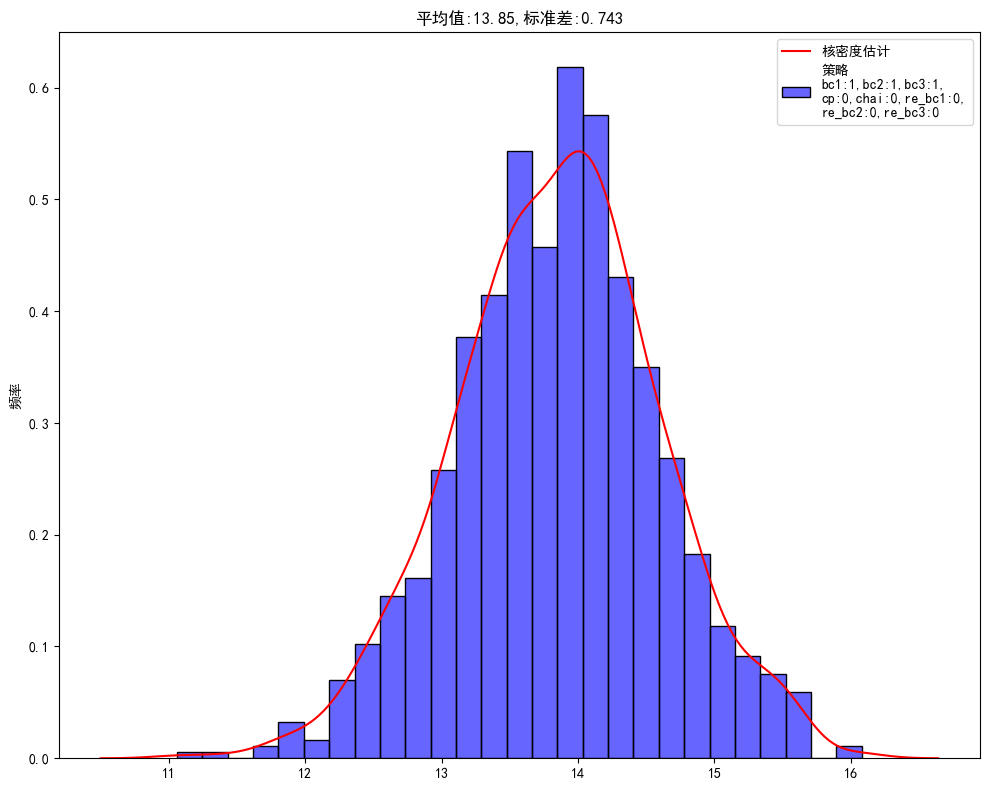

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def plot_histogram_with_pdf(csv_file):
    df = pd.read_csv(csv_file)
    data_str = df.iloc[0, -1]
    data_str = data_str.replace("[", "").replace("]", "").replace("\n", " ")
    data_list = list(map(float, data_str.split()))

    title = (
        str(df.iloc[0, -3:-1].to_dict())
        .replace("{", " ")
        .replace("}", "")
        .replace("'", "")
        .replace("mean", "平均值")
        .replace("std", "标准差")
        .replace(" ","")
    )
    text = (
        str(df.iloc[0, :-3].to_dict())
        .replace("{", " ")
        .replace("}", "")
        .replace("'", "")
        .replace("cp", "\ncp")
        .replace("re_bc2", "\nre_bc2")
        .replace(" ","")
    )

    sns.histplot(
        data_list,
        kde=False,
        stat="density",
        color="blue",
        alpha=0.6,
        label=f"策略\n{text}",
    )
    sns.kdeplot(data_list, color="red", label="核密度估计")
    plt.ylabel("频率")

    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_histogram_with_pdf(f"Q3_re/Q3result.csv")